<a href="https://colab.research.google.com/github/harrymccc1122/MNIST_ai_test/blob/main/run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-28-879c17a3d687>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((28, 28), Image.ANTIALIAS)  # Resize to 28x28 pixels


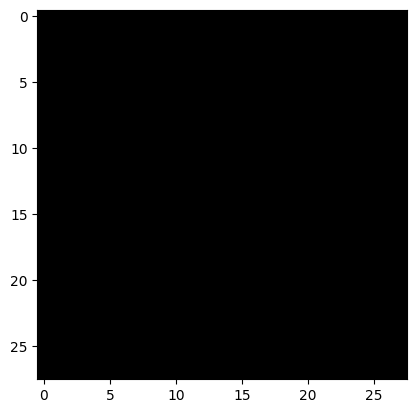

In [28]:
import cv2
from PIL import Image
import io

# Load the uploaded image
uploaded_image = "mine.png"
image = Image.open(uploaded_image).convert('L')  # Convert to grayscale
image = image.resize((28, 28), Image.ANTIALIAS)  # Resize to 28x28 pixels

# Convert image to numpy array
image_array = np.array(image)

# Invert colors (MNIST dataset is white text on black background)
image_array = 255 - image_array

# Normalize the image
image_array = image_array / 255.0

# Expand dimensions to match the model input
image_array = np.expand_dims(image_array, axis=-1)
image_array = np.expand_dims(image_array, axis=0)

# Display the preprocessed image
plt.imshow(image_array[0, :, :, 0], cmap='gray')
plt.show()


(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                

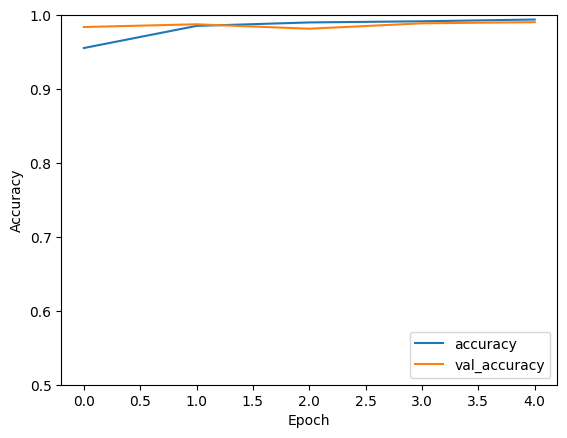

1/1 [==============================] - 0s 74ms/step
Predicted class: 7


In [8]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to a range of 0 to 1 before feeding them to the neural network model
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions to fit the model input requirements
train_images = train_images[..., tf.newaxis].astype("float32")
test_images = test_images[..., tf.newaxis].astype("float32")

# Verify the data
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

# Building the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Save the model
model.save('mnist_cnn_model.h5')

# Function to predict a single image
def predict_image(image):
    # Preprocess the image
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.image.resize(image, [28, 28])
    image = tf.expand_dims(image, 0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(image)
    predicted_class = tf.argmax(predictions[0]).numpy()
    return predicted_class

# Example of using the function
example_image = np.array(test_images[0])
predicted_class = predict_image(example_image)
print(f'Predicted class: {predicted_class}')


Saving Untitled drawing (1).jpg to Untitled drawing (1).jpg


<ipython-input-37-25d18f2503bb>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((28, 28), Image.ANTIALIAS)  # Resize to 28x28 pixels


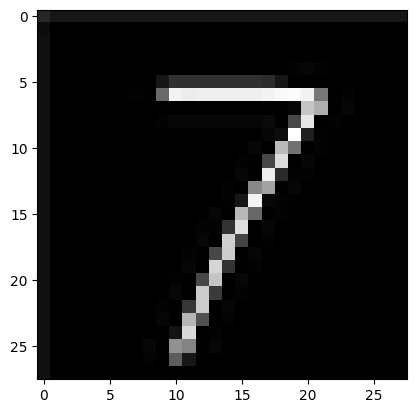

1/1 [==============================] - 0s 20ms/step
Predicted number: 7


In [37]:
from google.colab import files
uploaded = files.upload()


import cv2
from PIL import Image
import io

# Load the uploaded image
uploaded_image = list(uploaded.keys())[0]
image = Image.open(uploaded_image).convert('L')  # Convert to grayscale
image = image.resize((28, 28), Image.ANTIALIAS)  # Resize to 28x28 pixels

# Convert image to numpy array
image_array = np.array(image)

# Invert colors (MNIST dataset is white text on black background)
image_array = 255 - image_array

# Normalize the image
image_array = image_array / 255.0

# Expand dimensions to match the model input
image_array = np.expand_dims(image_array, axis=-1)
image_array = np.expand_dims(image_array, axis=0)

# Display the preprocessed image
plt.imshow(image_array[0, :, :, 0], cmap='gray')
plt.show()


# Predict the class of the uploaded image
predicted_class = model.predict(image_array)
predicted_number = np.argmax(predicted_class)
print(f'Predicted number: {predicted_number}')
